# Name: Prasad Sanjay Khalkar

# Roll No: 33138

# TE-09 L-09

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv("/home/prasadkhalkar/Desktop/ML/Datasets/Mall_Customers.csv")
mall = df.copy()
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
mall.shape

(200, 5)

In [55]:
mall.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
mall.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [57]:
encoder = preprocessing.LabelEncoder()

### Clustering for dataset1

In [58]:
temp = mall.drop(columns=['CustomerID','Age'],axis=1)
temp

,Genre,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40
...,...,...,...
195,Female,120,79
196,Female,126,28
197,Male,126,74
198,Male,137,18


In [59]:
temp['Genre'] = encoder.fit_transform(temp['Genre'])
temp['Genre'].unique()

array([1, 0])

In [60]:
cluster=[]
for k in range(1,9):
    kmean = KMeans(n_clusters=k).fit(temp)
    cluster.append(kmean.inertia_)

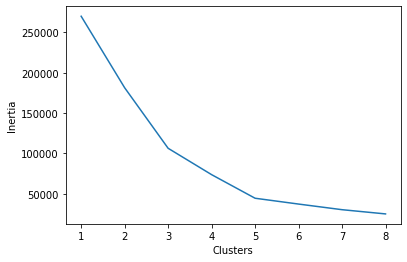

In [61]:
plt.plot(range(1,9),cluster)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,9))
plt.show()

In [77]:
km = KMeans(n_clusters=5).fit(temp)

In [82]:
temp['Labels'] = km.labels_
temp.Labels.unique()

array([0, 4, 2, 3, 1], dtype=int32)

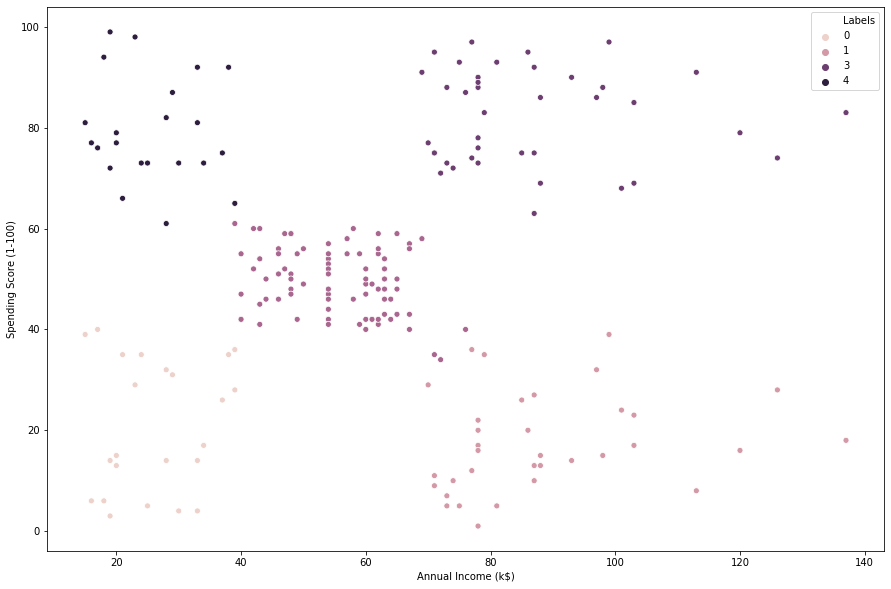

In [83]:
plt.figure(figsize=(15,10))
sns.scatterplot(temp['Annual Income (k$)'],temp['Spending Score (1-100)'],hue=temp['Labels'])
plt.show()

In [84]:
km.cluster_centers_

array([[ 3.91304348e-01,  2.63043478e+01,  2.09130435e+01,
         4.00000000e+00],
       [ 5.42857143e-01,  8.82000000e+01,  1.71142857e+01,
         1.00000000e+00],
       [ 4.07407407e-01,  5.52962963e+01,  4.95185185e+01,
        -8.88178420e-16],
       [ 4.61538462e-01,  8.65384615e+01,  8.21282051e+01,
         2.00000000e+00],
       [ 4.09090909e-01,  2.57272727e+01,  7.93636364e+01,
         3.00000000e+00]])

In [85]:
temp.Labels.value_counts()

2    81
3    39
1    35
0    23
4    22
Name: Labels, dtype: int64

### Clustering for dataset 2

In [67]:
ds2 = mall.drop(columns=['CustomerID','Annual Income (k$)'],axis=1)
ds2

,Genre,Age,Spending Score (1-100)
0,Male,19,39
1,Male,21,81
2,Female,20,6
3,Female,23,77
4,Female,31,40
...,...,...,...
195,Female,35,79
196,Female,45,28
197,Male,32,74
198,Male,32,18


In [68]:
ds2['Genre'] = encoder.fit_transform(ds2['Genre'])
ds2['Genre'].unique()

array([1, 0])

In [69]:
cluster=[]
for k in range(1,9):
    kmean = KMeans(n_clusters=k).fit(ds2)
    cluster.append(kmean.inertia_)

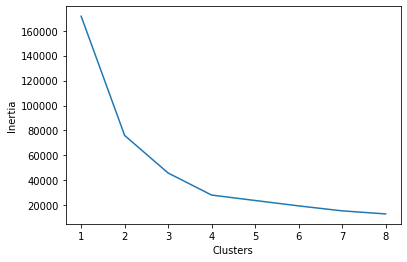

In [70]:
plt.plot(range(1,9),cluster)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,9))
plt.show()

In [71]:
km = KMeans(n_clusters=3).fit(ds2)

In [72]:
ds2['Labels'] = km.labels_
ds2

,Genre,Age,Spending Score (1-100),Labels
0,1,19,39,1
1,1,21,81,2
2,0,20,6,0
3,0,23,77,2
4,0,31,40,1
...,...,...,...,...
195,0,35,79,2
196,0,45,28,0
197,1,32,74,2
198,1,32,18,0


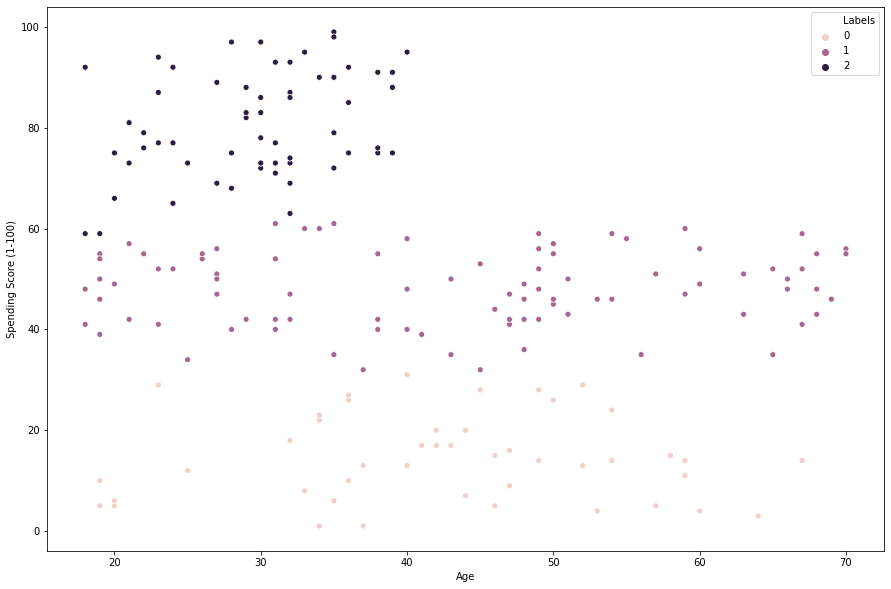

In [73]:
plt.figure(figsize=(15,10))
sns.scatterplot(ds2['Age'],temp['Spending Score (1-100)'],hue=ds2['Labels'])
plt.show()

In [74]:
km.cluster_centers_

array([[ 0.5106383 , 42.95744681, 14.59574468],
       [ 0.3956044 , 43.05494505, 47.78021978],
       [ 0.4516129 , 29.56451613, 80.74193548]])

In [75]:
ds2.Labels.value_counts()

1    91
2    62
0    47
Name: Labels, dtype: int64